### PCA - From Scratch

In [1]:
# ----- import relevant libraries --------
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.patches as patches # for animation purpose
from matplotlib import animation,patches # for animation purpose 
from matplotlib.lines import Line2D # here used for custom legends
# for interactive plots
%matplotlib notebook 

In [2]:
# ------ Load Data ------------- 
X = np.loadtxt('pca_data',delimiter=',') # loadind data to numpy array
X[:3] 

array([[3.38156267, 3.38911268],
       [4.52787538, 5.8541781 ],
       [2.65568187, 4.41199472]])

In [3]:
X.shape # no.of examples(m) x features(n)

(50, 2)

<IPython.core.display.Javascript object>


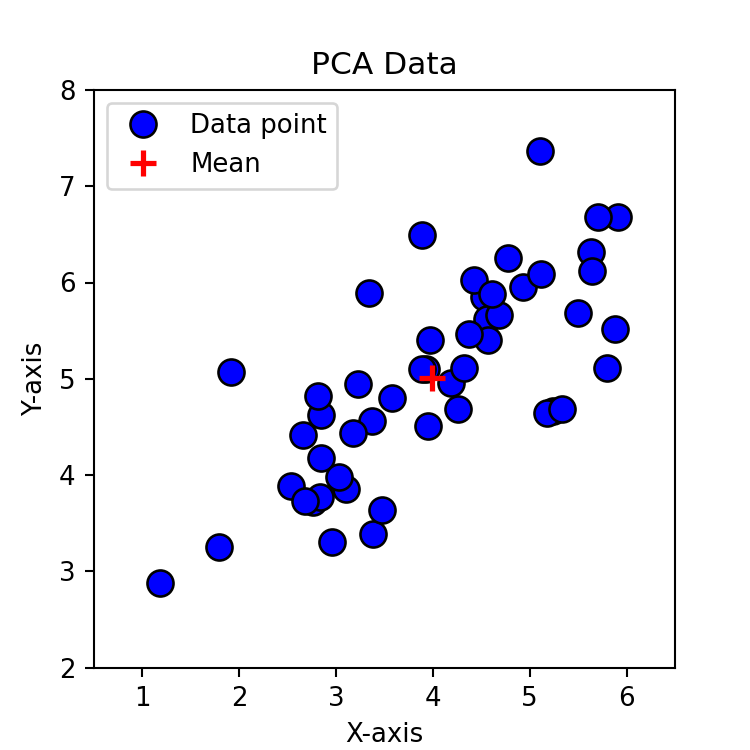

In [4]:
# ---------- Plotting our data ----------

plt.figure(figsize=(4,4),dpi=100)
plt.plot(X[:,0], X[:,1], 'bo', ms=10, mec='k', mew=1 )

# plot mean of our data
plt.plot(np.mean(X,axis=0)[0],np.mean(X,axis=0)[1], 'r+', ms=10, mew=2) 

plt.axis([0.5, 6.5, 2, 8]) # adjusting the view
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Custom legends for our graph
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Data point',
                          markerfacecolor='b', ms=10, mec='k', mew=1),
                   Line2D([0], [0], marker='+', color='w', label='Mean',
                          markerfacecolor='r', ms=10, mec='r', mew=2)]                  
plt.legend(handles=legend_elements)

plt.title('PCA Data')
plt.show()

### Normalization : 

Normalization means to make means of our features to 0 and scale by its standard deviation.
Before starting PCA on our dataset, it is standard practise to normalize our data. 

<u>Reasons for Normalization</u> : 

1. We center our data to origin, which makes easy for algorithm to perform PCA on our dataset.
2. We scale our features so that PCA gives equal importance to each feature.

<IPython.core.display.Javascript object>


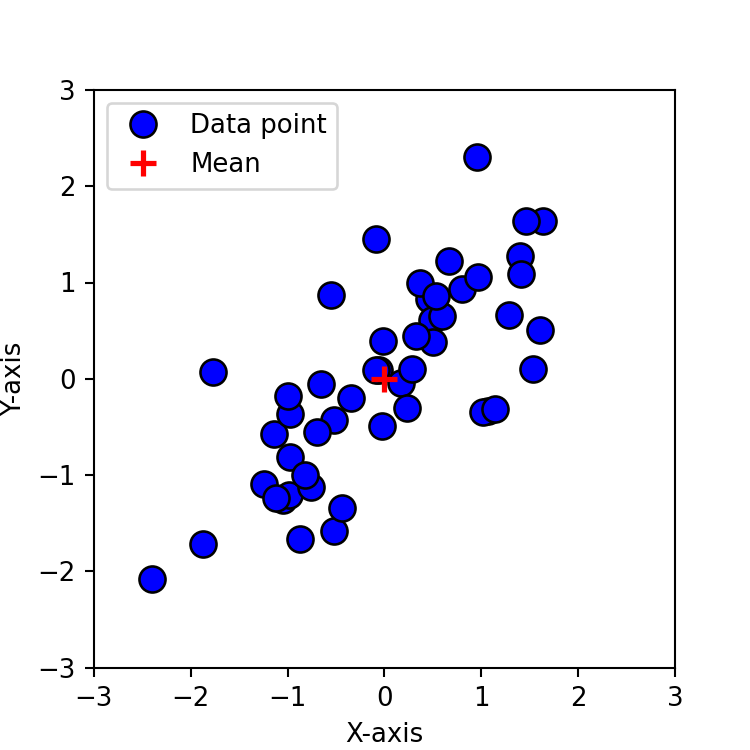

In [5]:
# ---------- Normalizing our data -----------

mean = np.mean(X,axis=0)
std = np.std(X, axis=0, ddof=1) # sample variance (std)
X_norm = (X - mean)/std # normalize and scale our features

plt.figure(figsize=(4,4),dpi=100)

plt.plot(X_norm[:,0], X_norm[:,1], 'bo', ms=10, mec='k', mew=1 ) # plot normalized data
norm_mean =  np.mean(X_norm,axis=0) # mean of normalized the data

plt.plot( norm_mean[0], norm_mean[1], 'r+', ms=10, mew=2) # plot new mean

# Custom legends for our graph
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Data point',
                          markerfacecolor='b', ms=10, mec='k', mew=1),
                   Line2D([0], [0], marker='+', color='w', label='Mean',
                          markerfacecolor='r', ms=10, mec='r', mew=2)]                  
plt.legend(handles=legend_elements)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis([-3, 3, -3, 3]) # adjusting view
plt.show()

### PCA - Process Steps

####  Step 1 :-   Compute Covariance Matrix of features for our data 

#### Covariance Matrix :

Matrix which gives variance of each feature on its diagonal elements and covariance between features on its non-diagonal elements


In [6]:
# ---------- Covariance Matrix of Normalized data ------------------

def cal_cov(norm_X): # Calculate Covariance Matrix 
    
    m = X.shape[0]
    # Covariance matrix must be of shape no. of features x no. of features
    Cov = (1/m) * np.dot(X_norm.T,X_norm) # nxm - mxn = nxn
    
    return Cov

Covariance_matrix = cal_cov(X)
Covariance_matrix # nxn - covariance matix of features of the data

array([[0.98      , 0.72081977],
       [0.72081977, 0.98      ]])

So you must have noticed that the Covariance Matrix is Symmetric Matrix.<br>
<b>Note</b> : A Symmetric matrix is symmetric about its diagonal i.e. $A = A^{T}$

<br></br>
#### Step 2 :- Find two orthogonal vectors which points in direction of maximum Variances

As our data is in 2 Dimension, we need to find 2 orthogonal vectors which points in the direction of maximum variance.<br>
>$1^{st}$ orthogonal vector will point in direction of the maximum variance. <br>
>$2^{nd}$ orthogonal vector will point in next direction of maximum variance and so on if we have n-dimensional data.<br>

In other words, We can also say that we need to find orthogonal vectors which minimizes the distance between the data points and our orthogonal vectors, which implies our previous statement.

<font color='#151B54'><i>Please Run below cell to see animation of what I mean</i></font>

<IPython.core.display.Javascript object>


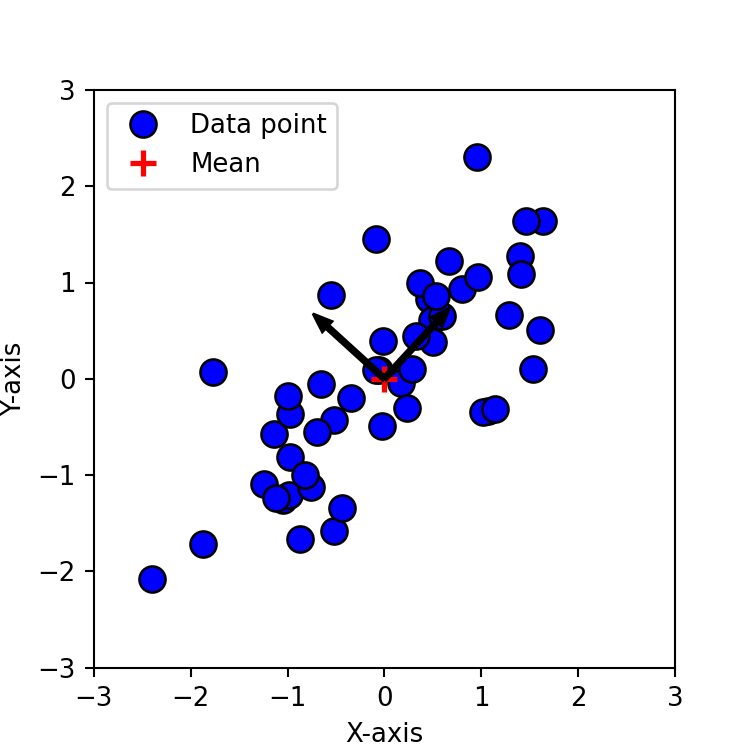

In [7]:
# ------- Animation for Orthogonal Vectors -------------

# Create figure
fig = plt.figure(figsize=(4,4))    
ax = fig.gca() # get axes

# Axes labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

#Set limit for better view
ax.set_ylim(-3,3)
ax.set_xlim(-3,3)

# Plot Normalized data and its mean
ax.plot(X_norm[:,0], X_norm[:,1], 'bo', ms=10, mec='k', mew=1, zorder=1)
ax.plot(norm_mean[0], norm_mean[1], 'r+', ms=10, mew=2, zorder=2)

# Custom legends for our graph
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Data point',
                          markerfacecolor='b', ms=10, mec='k', mew=1),
                   Line2D([0], [0], marker='+', color='w', label='Mean',
                          markerfacecolor='r', ms=10, mec='r', mew=2)]                  
plt.legend(handles=legend_elements, loc='upper left')

# Create respective array values to rotate our arrow
dx1 = np.cos(np.linspace(0,2.4 , 100)) 
dy1 = np.sin(np.linspace(0,2.4 , 100)) 

# Set array values of our next arrow so it should be perpendulicar to first
# By property of perpendicular lines, Slope_1 x Slope_2 = -1
dx2 = dy1 
dy2 = -dx1

# inital positions of our arrows
patch1 = patches.Arrow(0, 0, dx1[0], dy1[0], width=1,zorder=3) 
patch2 = patches.Arrow(0, 0, dx2[0], dy2[0], width=1,zorder=3)

def init(): # intial position of our arrows 
    
    ax.add_patch(patch1) # add initial pos of arrow 1
    ax.add_patch(patch2) # add initial pos of arrow 2
    
    return patch1,patch2

def animate(t): # animates our arrows 
    
    # Add arrows to patch
    patch1 = plt.Arrow(0, 0, dx1[t], dy1[t], width=0.25, color='black',zorder=3)
    patch2 = plt.Arrow(0, 0, dx2[t], dy2[t], width=0.25, color='black',zorder=3)
    ax.add_patch(patch1)
    ax.add_patch(patch2)
    
    # Remove previous after use
    ax.patches.pop(0) 
    ax.patches.pop(0) 
    
    return patch1,patch2

# Animation function
anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               interval=30,
                               blit=False)

plt.show()

- So, such vectors which points in direction of maximum variances are called Eigen vectors.<br>
- And the best thing about Symmetrix Matrix (which our Covariance matrix is!)  is that its eigen vectors are always orthogonal.<br>
- So finding eigen vectors of our Covariance Matrix will do the job.

In [8]:
# --------- Finding eigen values and vectors --------

def find_eigens(Cov_matrix): # Finds eigen vectors and eigen values 
    
    # returns tuple of eigen values and unit eigen vectors
    eigen_values, eigen_vectors = np.linalg.eig(Cov_matrix) 
    
    # sort the indices of  eigen value from large to small
    sort_indices = np.argsort(eigen_values)[::-1] 
    
    eigen_values = eigen_values[sort_indices] # sort the eigen values
    eigen_vectors = eigen_vectors[:,sort_indices] # sort eigen column vectors in same order
    
    return eigen_values, eigen_vectors

Eigen_Values, U = find_eigens(Covariance_matrix) 
print('Eigen Values :',Eigen_Values)
print('Eigen Vectors ↓')
U

Eigen Values : [1.70081977 0.25918023]
Eigen Vectors ↓


array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

<b>Note</b> : 
- Eigen vector with highest eigen value will be the vector pointing in direction of maximum variance.<br>
- Eigen vector with next highest eigen value will be the vector pointing in next direction of maximum variance and so on.....
- These eigen vectors are also called Principal Components (PCs) in PCA.

In [9]:
# calculate the percentage of variance explained/captured by each PC (eigen vector)

def cal_var_pc(array):
    
    total_variance = np.sum(array) # total variance
    var_in_pc = [] # stores variance captured by each PC
    
    for i in array:
        #percentage of variance captured by this PC 
        var_4_pc = round(i/total_variance,2)  * 100
        var_in_pc.append(var_4_pc)
        
    return var_in_pc

pca_variance = cal_var_pc(Eigen_Values)
pca_variance

[87.0, 13.0]

<IPython.core.display.Javascript object>


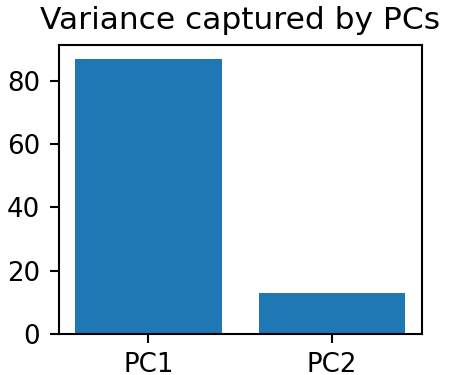

In [10]:
#------ Plot bar graph for variance caputured by PCs --------
plt.figure(figsize=(2.5,2))
plt.bar(['PC1','PC2'], pca_variance)
plt.title('Variance captured by PCs')
plt.ylabel('Percentage of Variance Captured by PC')
plt.xlabel('Principal Components')
plt.show()

<IPython.core.display.Javascript object>


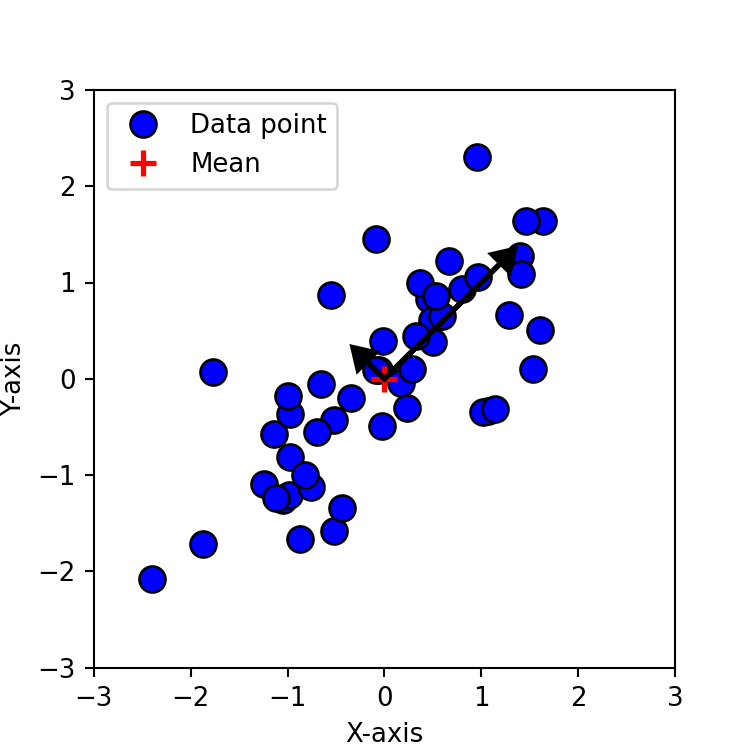

In [11]:
# ------------- Plotting PCs on our data plot --------------

fig,ax =  plt.subplots(figsize=(4,4),dpi=100)

# Plot our data
ax.plot(X_norm[:, 0], X_norm[:, 1], 'bo', ms=10, mec='k', mew=1)
ax.plot( norm_mean[0], norm_mean[1], 'r+', ms=10, mew=2) 

# Plot eigen vectors (PCs)
for i in range(U.shape[1]):
    ax.arrow(norm_mean[0], norm_mean[1],  Eigen_Values[i]*U[0,i], Eigen_Values[i]*U[1,i],
             head_width=0.25,head_length=0.2, fc='k', ec='k', lw=2, zorder=1000)

# Custom legends for our graph
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Data point',
                          markerfacecolor='b', ms=10, mec='k', mew=1),
                   Line2D([0], [0], marker='+', color='w', label='Mean',
                          markerfacecolor='r', ms=10, mec='r', mew=2)]

plt.legend(handles=legend_elements)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')    
plt.axis([-3, 3, -3, 3])
plt.show()

#### Step 3 : Project our data onto first 'K' PCs
We will project our data onto $1^{st}$ PC as it captures 87% of Variance of our data

<IPython.core.display.Javascript object>


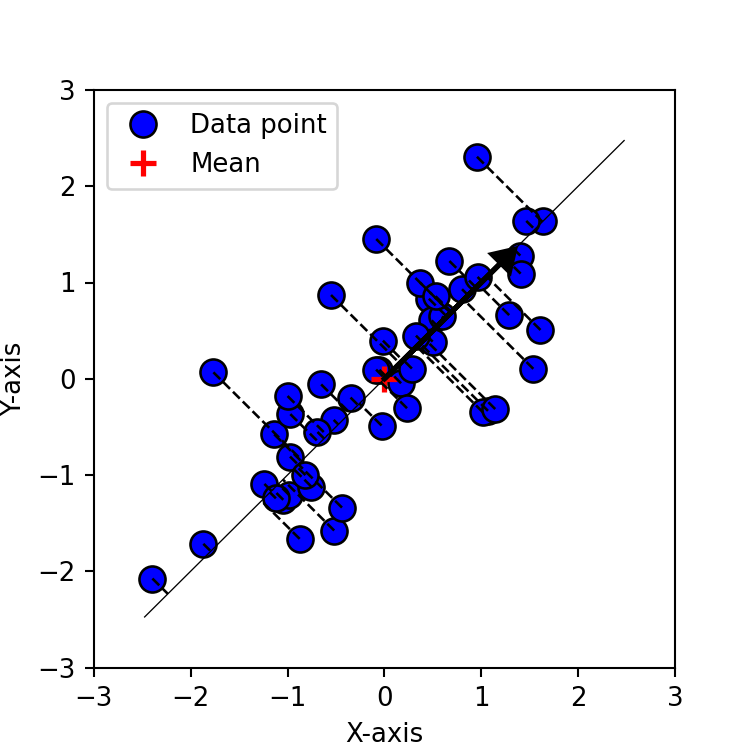

In [12]:
#--------- Plot for to project data on 1st PC -------------  

fig,ax =  plt.subplots(figsize=(4,4),dpi=100)

# plot data and mean
ax.plot(X_norm[:, 0], X_norm[:, 1], 'bo', ms=10, mec='k', mew=1)
ax.plot( norm_mean[0], norm_mean[1], 'r+', ms=10, mew=2,zorder=2) 

# plot our first PC 
ax.arrow(norm_mean[0], norm_mean[1],  Eigen_Values[0]*U[0,0], Eigen_Values[0] * U[1,0],
             head_width=0.25,head_length=0.2, fc='k', ec='k', lw=2, zorder=1000)

# plot thin line along our PC vector
ax.plot([-3.5 * U[0,0], 3.5 * U[0,0]] ,[-3.5 * U[1,0],3.5 * U[1,0]], lw = 0.5, color='black')

# plot for dashed lines
Z_temp = np.dot(X_norm,U[:,0:1])
Proj = U[:,0:1].T * Z_temp
for xnorm, proj in zip(X_norm, Proj):
    ax.plot([xnorm[0], proj[0]], [xnorm[1], proj[1]], '--k', lw=1)

# Custom legends for our graph
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Data point',
                          markerfacecolor='b', ms=10, mec='k', mew=1),
                   Line2D([0], [0], marker='+', color='w', label='Mean',
                          markerfacecolor='r', ms=10, mec='r', mew=2)]

plt.legend(handles=legend_elements)
plt.xlabel('X-axis')
plt.ylabel('Y-axis') 

plt.axis([-3, 3, -3, 3])
plt.show()

(50, 1)


<IPython.core.display.Javascript object>


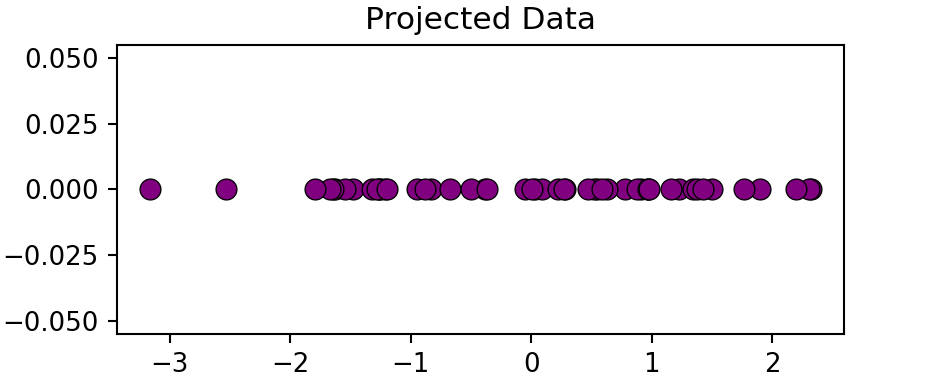

In [13]:
# ------ function for projecting our data --------------

def project_onto(X,U,K):
    # Project data on first 'K' Principal Components
    Z = np.dot(X,U[:,:K]) # mxn - nxK = mxK
    
    return Z

Z = project_onto(X_norm,U,1) # project data on first PC
print(Z.shape)

# Show our projected data 
plt.figure(figsize=(5,2))
# Plotting in two dimension just for plotting purpose
plt.plot(Z,np.zeros(len(Z)),'o',color = 'purple', ms=8, mec='k', mew=0.5)
plt.title('Projected Data')
plt.show()

>Now, we have reduced the data from 2-Dimension to 1-Dimension.

#### Step 4 : We can recover our data back to original dimension, if we want.

<IPython.core.display.Javascript object>


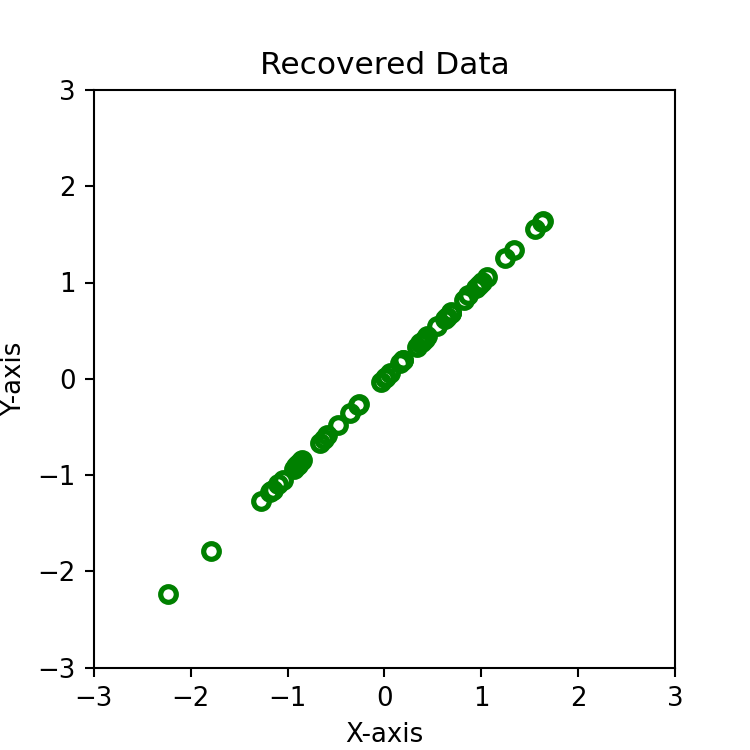

In [14]:
# Recover our data back to our original dimension
def recover_back(Z,U,K):
    
    X_rec = np.dot(Z,U[:,:K].T) # mxK - Kxn = mxn
    
    return X_rec

X_rec = recover_back(Z,U,1) # Recoverd data 

# Plot recovered data 
plt.figure(figsize=(4,4))
plt.plot(X_rec[:, 0], X_rec[:, 1], 'go', mec='g', mew=2, mfc='none')

plt.xlabel('X-axis')
plt.ylabel('Y-axis') 
plt.title('Recovered Data')             


plt.axis([-3, 3, -3, 3])
plt.show()

<IPython.core.display.Javascript object>


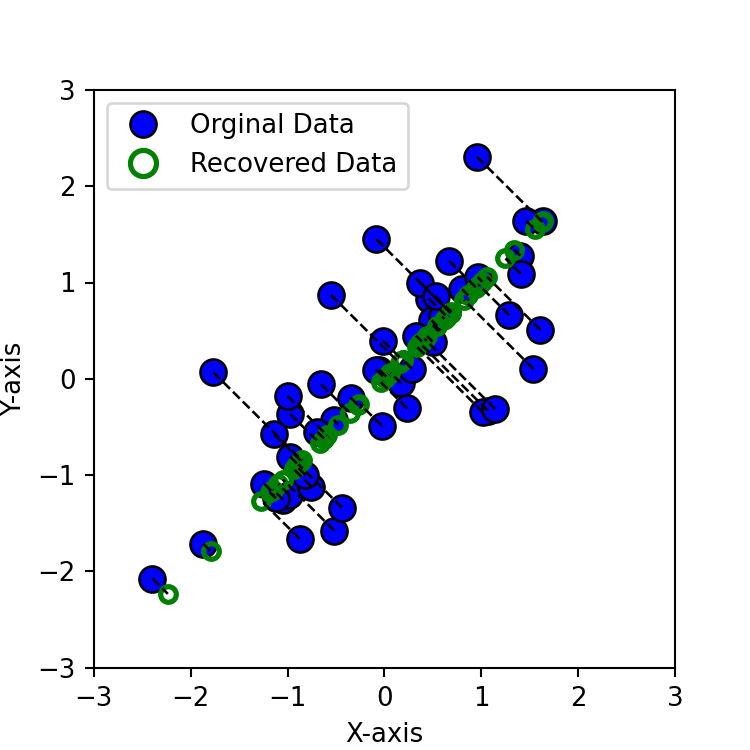

In [15]:
# See Difference between our Original Data and Recovered Data

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(X_norm[:, 0], X_norm[:, 1], 'bo', ms=10, mec='k', mew=1)

plt.axis([-3, 3, -3, 3])

# Draw lines connecting the projected points to the original points
ax.plot(X_rec[:, 0], X_rec[:, 1], 'go', mec='g', mew=2, mfc='none')
for xnorm, xrec in zip(X_norm, X_rec):
    ax.plot([xnorm[0], xrec[0]], [xnorm[1], xrec[1]], '--k', lw=1)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Custom legends for our graph
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Orginal Data',
                          markerfacecolor='b', ms=10, mec='k', mew=1),
                   Line2D([0], [0], marker='o', color='w', label='Recovered Data',
                          markerfacecolor='g', ms=10, mec='g', mew=2,mfc='none')]                  
plt.legend(handles=legend_elements)

plt.show()

I have combined all the required functions for PCA and built a model (class) for the same.<br>
Please [click here](my_pca_from_scratch.py) to see the file.

In [16]:
from my_pca_from_scratch import My_PCA
model = My_PCA()
U = model.run_pca(X_norm)
U

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

### References : 
>1. Linear Algebra and its Applications - By David.C.Lay
>2. [Andrew Ng's Machine Learning Course](https://www.coursera.org/learn/machine-learning)